In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
Startups_Data=pd.read_csv('50_Startups.csv')
Startups_Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
Startups_Data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
Startups_Data.shape

(50, 5)

In [6]:
Startups_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
Startups_Data[Startups_Data.duplicated()].shape

(0, 5)

In [8]:
Startups_Data.drop_duplicates(inplace=True)

In [9]:
Startups_Data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
Startups_Data.rename(columns={'R&D Spend':'RD_Spend'},inplace=True)
Startups_Data.rename(columns={'Marketing Spend':'Marketing_Spend'},inplace=True)
Startups_Data.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
Startups_Data['RD_Spend'].describe()

count        50.000000
mean      73721.615600
std       45902.256482
min           0.000000
25%       39936.370000
50%       73051.080000
75%      101602.800000
max      165349.200000
Name: RD_Spend, dtype: float64

In [13]:
Startups_Data['Administration'].describe()

count        50.000000
mean     121344.639600
std       28017.802755
min       51283.140000
25%      103730.875000
50%      122699.795000
75%      144842.180000
max      182645.560000
Name: Administration, dtype: float64

In [14]:
Startups_Data['Marketing_Spend'].describe()

count        50.000000
mean     211025.097800
std      122290.310726
min           0.000000
25%      129300.132500
50%      212716.240000
75%      299469.085000
max      471784.100000
Name: Marketing_Spend, dtype: float64

In [15]:
Startups_Data['State'].describe()

count           50
unique           3
top       New York
freq            17
Name: State, dtype: object

In [16]:
Startups_Data['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

In [17]:
numerical_features = Startups_Data.describe(include=["int64","float64"]).columns
numerical_features

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')

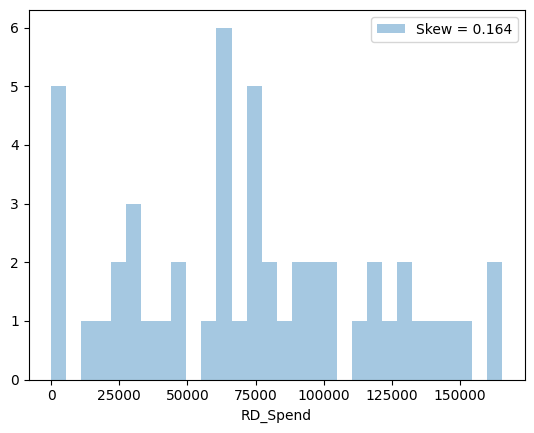

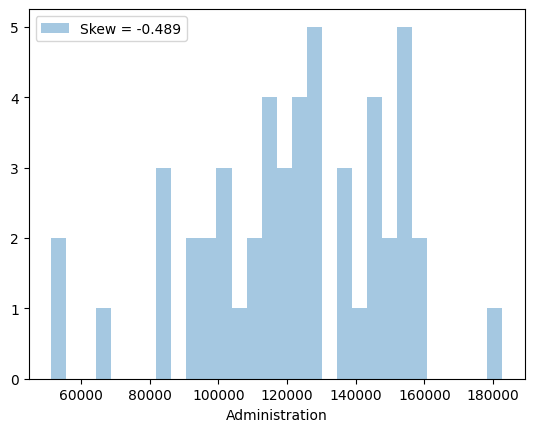

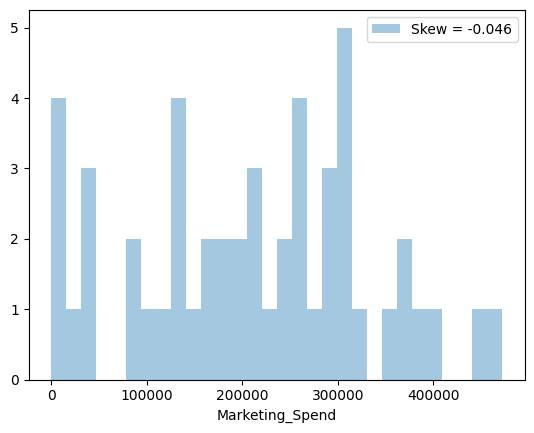

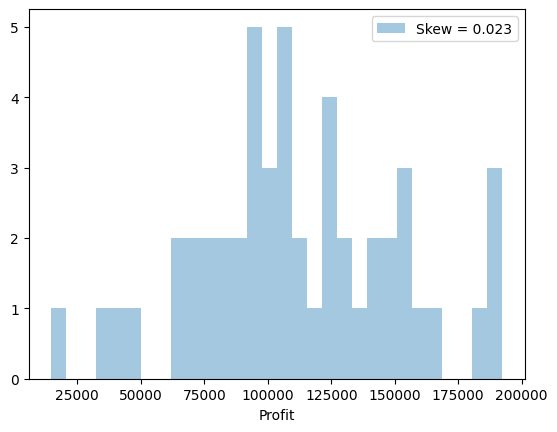

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in numerical_features:
    skew = Startups_Data[i].skew()
    sns.distplot(Startups_Data[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

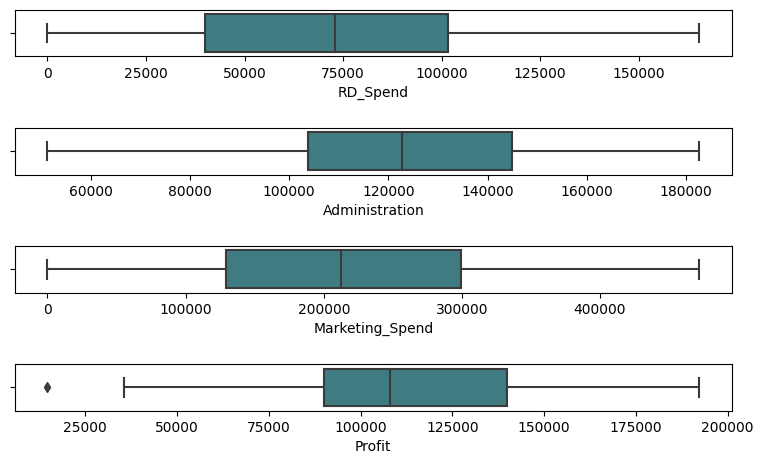

In [20]:
fig, axes = plt.subplots(4,1,figsize=(8,5),sharex=False,sharey=False)
sns.boxplot(x='RD_Spend', data= Startups_Data,palette='crest',ax=axes[0])
sns.boxplot(x='Administration',data= Startups_Data,palette='crest',ax=axes[1])
sns.boxplot(x='Marketing_Spend',data= Startups_Data,palette='crest',ax=axes[2])
sns.boxplot(x='Profit',data= Startups_Data,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [21]:
Startups_Data.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


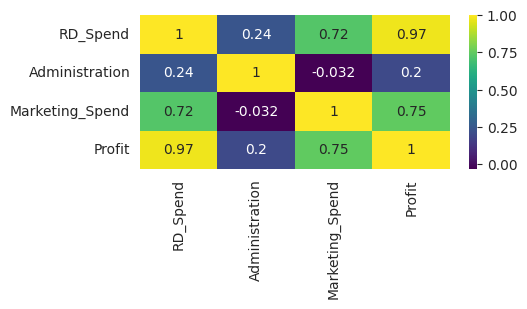

In [23]:
fig, ax = plt.subplots(figsize=(5,2))
sns.heatmap(Startups_Data.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

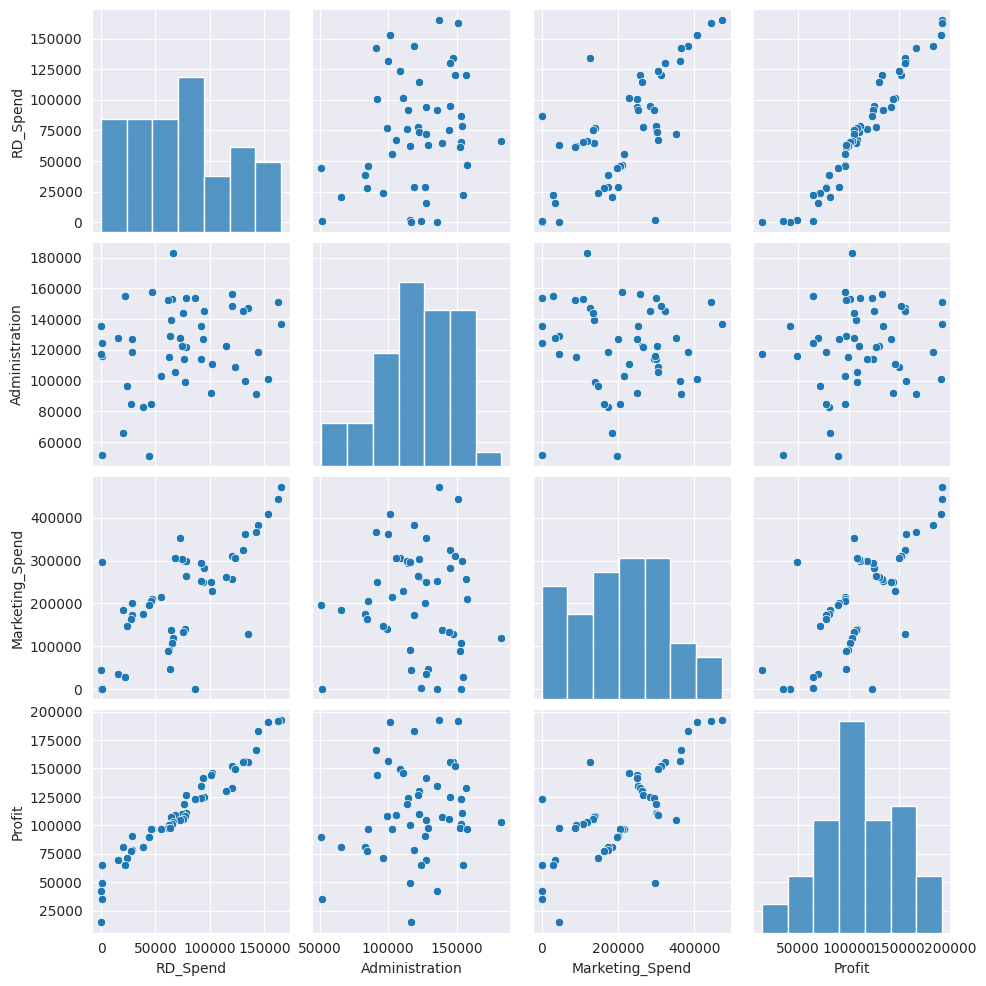

In [24]:
sns.set_style(style='darkgrid')
sns.pairplot(Startups_Data)

In [25]:
model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=Startups_Data).fit()

In [26]:
model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [27]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [28]:
Startups_Data['Predictions']=model.fittedvalues
Startups_Data['Errors']=model.resid
Startups_Data.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit,Predictions,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


In [29]:
model.pvalues

Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64

In [30]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [31]:
rsq_RD_Spend=smf.ols('RD_Spend~Administration+Marketing_Spend',data=Startups_Data).fit().rsquared
rsq_Administration=smf.ols('Administration~RD_Spend+Marketing_Spend',data=Startups_Data).fit().rsquared
rsq_Marketing_Spend=smf.ols('Marketing_Spend~RD_Spend+Administration',data=Startups_Data).fit().rsquared
d1={'Variables':['RD_Spend','Administration','Marketing_Spend'],'rsquared':[rsq_RD_Spend,rsq_Administration,rsq_Marketing_Spend]}
rsq_frame=pd.DataFrame(d1)
rsq_frame

,Variables,rsquared
0,RD_Spend,0.594962
1,Administration,0.149002
2,Marketing_Spend,0.570220


In [32]:
vif_RD_Spend=1/(1-rsq_RD_Spend)
vif_Administration=1/(1-rsq_Administration)
vif_Marketing_Spend=1/(1-rsq_Marketing_Spend)
d2={'variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_RD_Spend,vif_Administration,vif_Marketing_Spend]}
vif_frame=pd.DataFrame(d2)
vif_frame

,variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773
